In [53]:
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [45]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

/home/inspiron/my_project_dir/my_project_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[117,  13],
       [ 24,  38]])

Text(0.5, 257.44, 'Predicted label')

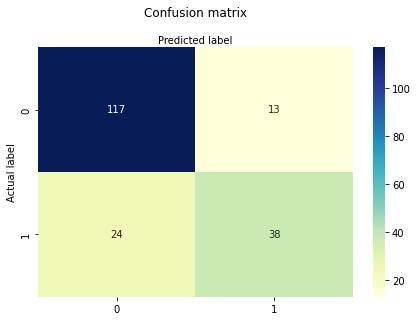

In [46]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516
F1_Score: 0.672566371681416
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



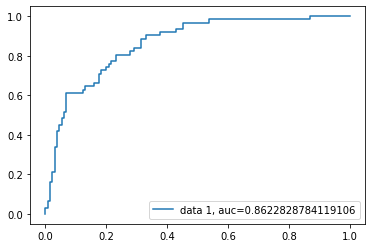

In [48]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [49]:
#model saving and loading
import joblib

joblib.dump(logreg, 'diabeteseModel.pkl')
diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

In [50]:
lst=[]
lst2=[]
lst3=[]
lst4=[]
lst5=[]
lst6=[]
lst7=[]
lst8=[]
ele = float(input("Enter Pregnancies:"))
lst.append(ele)
ele = float(input("Enter Glucose:"))
lst2.append(ele)
ele = float(input("Enter BloodPressure:"))
lst3.append(ele)
ele = float(input("Enter SkinThickness:"))
lst4.append(ele)
ele = float(input("Enter Insulin:"))
lst5.append(ele)
ele = float(input("Enter BMI:"))
lst6.append(ele)
ele = float(input("Enter DiabetesPedigreeFunction:"))
lst7.append(ele)
ele = float(input("Enter Age:"))
lst8.append(ele)
df = pd.DataFrame(list(zip(lst,lst2,lst3,lst4,lst5,lst6,lst8)),
               columns =['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree'])
sampleDataFeatures = np.asarray(df)
sampleDataFeatures

Enter Pregnancies:4
Enter Glucose:136
Enter BloodPressure:70
Enter SkinThickness:0
Enter Insulin:0
Enter BMI:31.2
Enter DiabetesPedigreeFunction:1.182
Enter Age:22


array([[  4. , 136. ,  70. ,   0. ,   0. ,  31.2,  22. ]])

In [51]:
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
predictionProbab = diabetesLoadedModel.predict_proba(sampleDataFeatures)
if(prediction[0]==1):
    print("Diabetic")
else:
    print("Not Diabetic")

Diabetic
